# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
import pandas as pd
import numpy as np

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('geo_dot.csv', sep=';')

In [5]:
df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


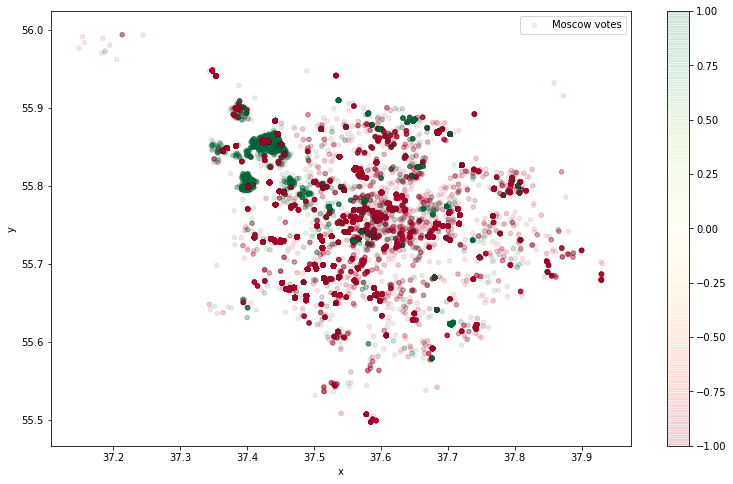

In [6]:
df.plot(kind="scatter", x="x", y="y", alpha=0.1, label="Moscow votes", figsize=(13,8),
    c=df.comment_class, cmap=plt.get_cmap("RdYlGn"), colorbar=True , sharex=False)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X = df[['x','y']]
y = df['comment_class']

In [10]:
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [12]:
# поищем оптимальное количетво кластеров
k_inertia = []
ks = range(4,15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

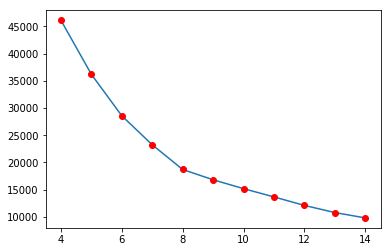

In [13]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [14]:
diff = np.diff(k_inertia)

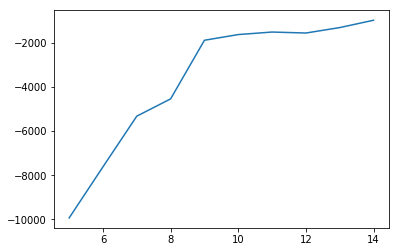

In [15]:
plt.plot(ks[1:], diff)

In [16]:
diff_r = diff[1:] / diff[:-1]

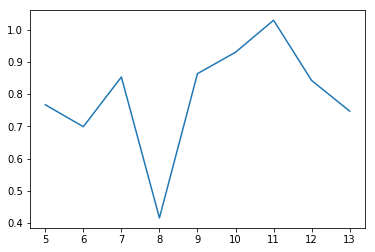

In [17]:
plt.plot(ks[1:-1], diff_r)

In [18]:
# оптимальное количество районов - 8
k_opt = ks[np.argmin(diff_r)+1]
k_opt

8

In [19]:
alpha=0.1
clusters = KMeans(n_clusters=8).fit_predict(X_scaled)

### 1. визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

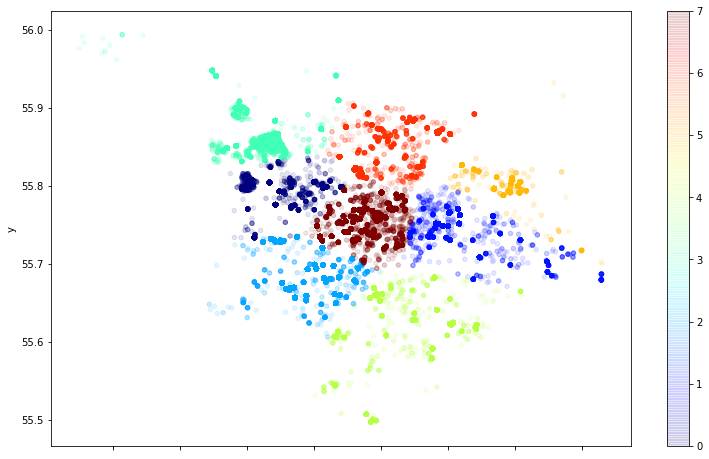

In [20]:
df.plot(kind="scatter", x='x', y='y', c=clusters, alpha=0.1, figsize=(13,8),
       cmap=plt.get_cmap("jet"), colorbar = True)

## Посмотрим отдельно на голоса За и Против на карте

In [21]:
df_agree = df[df['comment_class']==1]
df_disagree = df[df['comment_class']==-1]

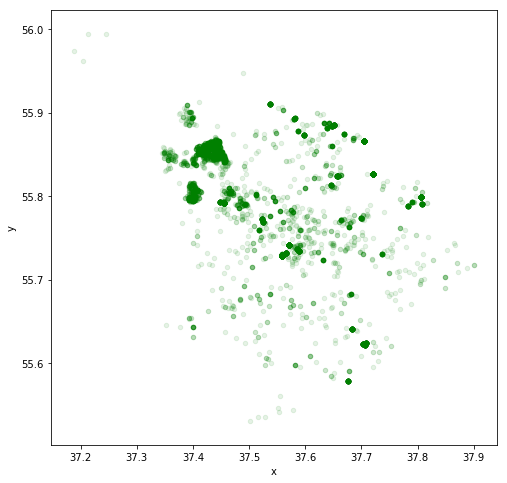

In [22]:
# голоса ЗА
df_agree.plot(kind="scatter", x='x', y='y', alpha=0.1, figsize=(8,8), c='green')

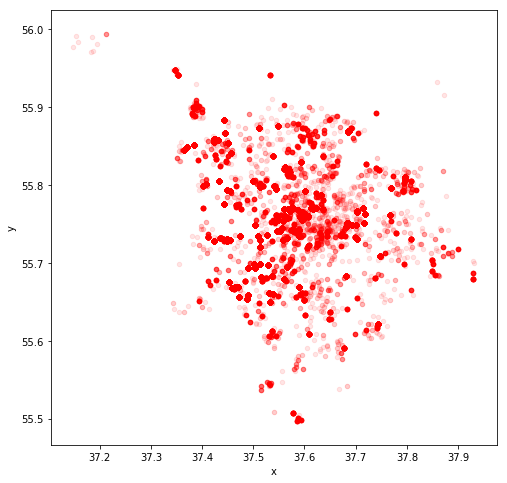

In [23]:
# голоса Против
df_disagree.plot(kind="scatter", x='x', y='y', alpha=0.1, figsize=(8,8), c='red')

## Найдем оптимальное количество кластеров для проголосовавших ЗА

In [24]:
X_agree = df_agree[['x','y']]

X_scaled = scaler.fit_transform(X_agree)

# поищем оптимальное количетво кластеров
k_inertia = []
ks = range(2,15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]

# оптимальное количество районов - 3
k_opt = ks[np.argmin(diff_r)+1]
k_opt

clusters = KMeans(n_clusters=k_opt).fit_predict(X_scaled)

df_agree.plot(kind="scatter", x='x', y='y', c=clusters, alpha=0.1, figsize=(13,8),
       cmap=plt.get_cmap("jet"))

## Найдем оптимальное количество кластеров для проголосовавших Против

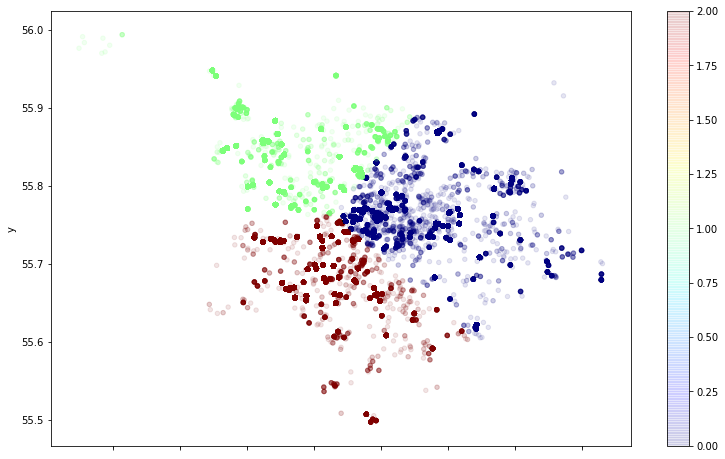

In [26]:
X_disagree = df_disagree[['x','y']]

X_scaled = scaler.fit_transform(X_disagree)

# поищем оптимальное количетво кластеров
k_inertia = []
ks = range(2,15)
x 
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]

# оптимальное количество районов - 3
k_opt = ks[np.argmin(diff_r)+1]
n_clusters = k_opt

clusters = KMeans(n_clusters=n_clusters).fit_predict(X_scaled)

df_disagree.plot(kind="scatter", x='x', y='y', c=clusters, alpha=0.1, figsize=(13,8),
       cmap=plt.get_cmap("jet"), colorbar = True)

## DBSCAN 

найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
clf = DBSCAN(eps = 0.3, metric = 'euclidean',min_samples=10000)
clusters = clf.fit_predict(X_scaled)

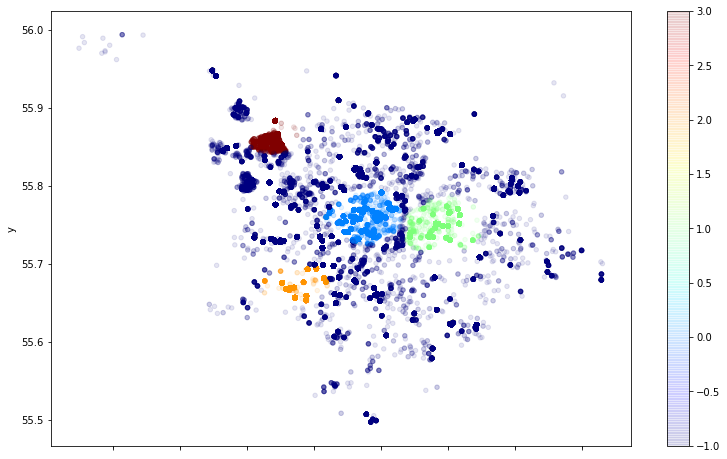

In [22]:
df.plot(kind="scatter", x='x', y='y', c=clusters, alpha=0.1, figsize=(13,8),
       cmap='jet', colorbar = True)

In [23]:
df['active_district'] = clusters

In [24]:
# оставим только активные районы
df_active =  df[df['active_district']!=-1]

In [25]:
df_active.to_csv('active_district.csv')

### посмотрим на Google карте, какие это районы
жаль, что можно вывести максимум 2000 точек :(
https://drive.google.com/open?id=1FZ4VBMDhsJwmF3BiuU5Pfg88cRdplcnN&usp=sharing

## хочется, чтобы было все и красиво

In [13]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

MO_COORDINATES = (55.764414, 37.647859)
votes = pd.read_csv('active_district.csv')

map = folium.Map(location=MO_COORDINATES, zoom_start=10)

mc = MarkerCluster()

for each in votes.iterrows():
    mc.add_child(folium.Marker(location=[each[1]['y'],each[1]['x']]))
 
map.add_child(mc)

map.save('folium_map.html')

In [6]:
from skimage.io import imread
import pylab

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

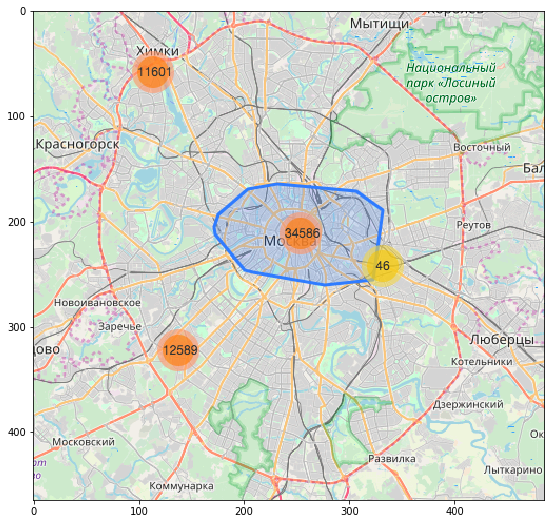

In [10]:
# голоса объеденены в кластеры, они интерактивные
pylab.imshow(imread('Map 1.png'))

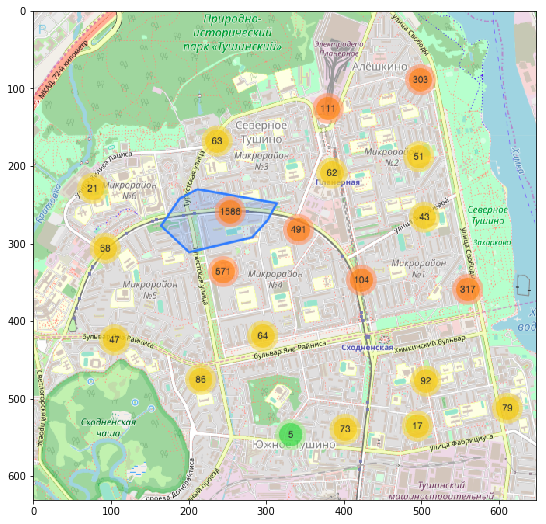

In [11]:
# при приближении кластеры делятся на более мелкие
pylab.imshow(imread('Map 2.png'))

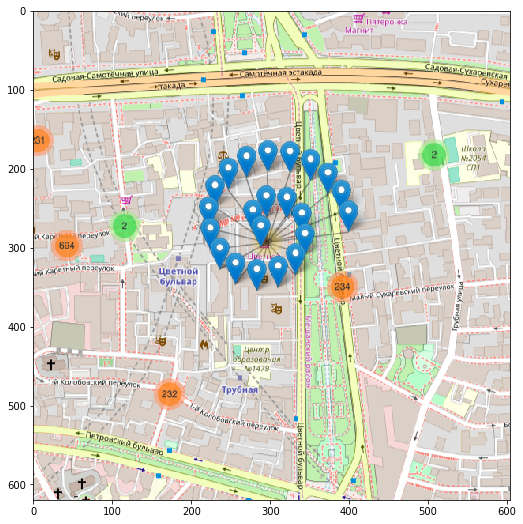

In [12]:
# можно посмотреть вплоть до точек
pylab.imshow(imread('Map 3.png'))